In [0]:
import glob
import pandas as pd
import datetime

In [0]:
# Authenticate google drive access and mount it to /content/drive path.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Check the contents of the Data/ directory.
DATA_PATH_PREFIX = '/content/drive/My Drive/Colab Notebooks/Data'
def get_data_file(file_name):
  return DATA_PATH_PREFIX+'/'+file_name
glob.glob(DATA_PATH_PREFIX + '/*')

['/content/drive/My Drive/Colab Notebooks/Data/workouts.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/workouts.gsheet',
 '/content/drive/My Drive/Colab Notebooks/Data/brezinova.marianna@gmail.com_0_summarizedActivities.json',
 '/content/drive/My Drive/Colab Notebooks/Data/2019-10-19_2020-01-27_81041029_sleepData.json',
 '/content/drive/My Drive/Colab Notebooks/Data/2020-01-27_2020-05-06_81041029_sleepData.json',
 '/content/drive/My Drive/Colab Notebooks/Data/MetricsMaxMetData_20191206_20200315_81041029.json',
 '/content/drive/My Drive/Colab Notebooks/Data/81041029_MenstrualCycles.json',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT',
 '/content/drive/My Drive/Colab Notebooks/Data/HR_cycle.png',
 '/content/drive/My Drive/Colab Notebooks/Data/workouts2.csv']

In [0]:
prefix = '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR'
def get_file(file_name):
  return prefix + '/' + file_name
glob.glob(prefix + '/*')

['/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_21.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_20.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_19.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_18.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_17.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_16.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_15.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_14.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_13.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_12.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_11.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_10.csv',
 '/content/drive/My Drive/Co

#**Definitions**

In [0]:
def read_workouts(file):
  data = pd.read_csv(get_data_file(file))
  return data

def append_data(data, file):
  data2 = data.append(pd.read_csv(get_data_file(file)))
  return data2

def read_resting_HR():
  i = 0
  HR = []
  for file in glob.glob(prefix+'/*'):
    HR.append(pd.read_csv(get_file('HR_'+str(i)+'.csv'), skiprows=[1]))
    i += 1
  return HR

def cleanup_workouts(data):
  data_clean = data.dropna(axis=1, how='all')
  data_clean = data_clean[["WorkoutType", "WorkoutDay", "HeartRateAverage", "HeartRateMax"]]
  data_clean = data_clean.rename(columns={"WorkoutType":"Type", "HeartRateAverage":"HR_avg", "HeartRateMax":"HR_max"})
  return data_clean

def cleanup_HR(data):
  day_delta = datetime.timedelta(days=1)
  start_date = datetime.date(2019, 12, 4)
  weeks = []
  for i in range(len(data)):
    week = []
    end_date = start_date + 7*day_delta
    for j in range((end_date-start_date).days):
      week.append(start_date + j*day_delta)
    weeks.append(week)
    start_date = end_date

  for i in range(len(data)):
    data[i]['Date'] = weeks[i]

  data = pd.concat(data)
  data = data.reset_index()
  data = data[['Resting Heart Rate', 'Date']]
  data = data.rename(columns={'Resting Heart Rate':'HR'})
  return data

def rolling_HR(data, window):
  data['Resting_HR'] = data.rolling(window=window, min_periods=1, center=True).mean()
  return data

def rolling_workouts(data, window):
  data['Workout_avg_HR'] = data['HR_avg'].rolling(window=window, min_periods=1, center=True).mean()
  return data

def date_datetime(data, column):
  data[column] = pd.to_datetime(data[column])
  return data

def plotting(data1, data2, x1, x2, y1, y2):
  ax = data1.plot(x=x1, y=y1, figsize=(30, 10), color='blue')
  ay = data2.plot(x=x2, y=y2, ax=ax, secondary_y=True, color='red')
  return ay

#**Correlation between average HR from workouts and resting HR**

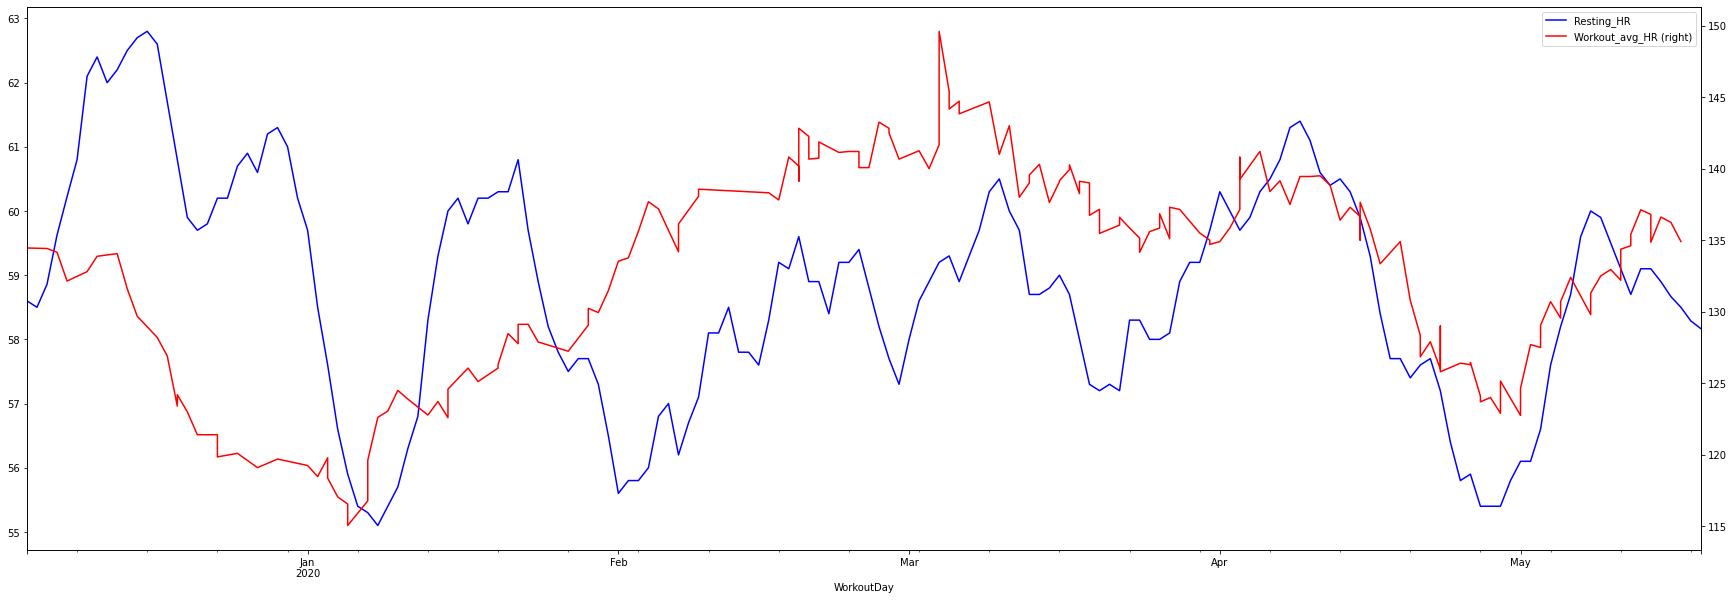

In [0]:
workouts = read_workouts('workouts.csv')
workouts = append_data(workouts, 'workouts2.csv')
workouts = cleanup_workouts(workouts)
workouts = rolling_workouts(workouts, 20)
workouts = date_datetime(workouts, 'WorkoutDay')

HR = read_resting_HR()
HR = cleanup_HR(HR)
HR = rolling_HR(HR, 10)
HR = date_datetime(HR, 'Date')

plotting(HR, workouts, 'Date', 'WorkoutDay', 'Resting_HR', 'Workout_avg_HR')